<a href="https://colab.research.google.com/github/rviano96/deep-learning/blob/main/BostonHousing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Sparse features
import tensorflow as tf
import numpy as np
#Samples contain 13 attributes of houses at different locations around the Boston 
#suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).
from tensorflow.keras.datasets import boston_housing
import matplotlib.pylab as plt

In [3]:
#We have less data so the batch size should be small
batch_size=10
epochs=50

(xt,yt),(xtest,ytest)= boston_housing.load_data()

#Normalize data.
#There are multiple methods, this is one of them.
#At the end the data will be between -1 and 1
mean = xt.mean(axis=0) #Compute the mean (sum of data divided by the number of data-points)
xt -= mean #Substract the mean from the data
std = xt.std(axis=0) #Compute the standard deviation(the square root of its variance)
xt /= std #Divide by the standard deviation (here we get the data between -1 and 1)
#We apply the same normalization for our test data.
#Important: The mean and the standard deviation used must be the same
#than the one used for the training data.
xtest -= mean
xtest /= std

#We normalize the "results" colum. 
#To get values betweeen 0 and 1
max = np.max(yt)
yt /= max
ytest /= max


In [4]:
#Classic network (not ccn) because we only have sparse features
inputs=tf.keras.layers.Input(shape=(xt.shape[1],))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
#Linear activation is used in regression models
#It allows the output to fit "freely"
x=tf.keras.layers.Dense(1,activation='linear')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [5]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.9)#SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#We use other loss function because it's regression not classification
#MSE: mean squared error. Compare the output, computes the error and try to get a better error in the next iteration
#MAE: mean absolute error. Compare the output, computes the error and try to get a better error in the next iteration
model.compile(loss=tf.keras.losses.mse,optimizer=adam,metrics=['mse'])

In [6]:
#the history get the history of the training
history=model.fit(xt,yt,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(xtest,ytest))

Epoch 1/50
41/41 [==============================] - 2s 10ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 2/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 3/50
41/41 [==============================] - 0s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 4/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 5/50
41/41 [==============================] - 0s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 6/50
41/41 [==============================] - 0s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 7/50
41/41 [==============================] - 0s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 8/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0043 - mse: 0.0

In [7]:
#Test the model
pointing = model.evaluate(xtest, ytest, verbose=1)
print(pointing)

4/4 [==============================] - 0s 4ms/step - loss: 0.0062 - mse: 0.0062
[0.006193504203110933, 0.006193504203110933]


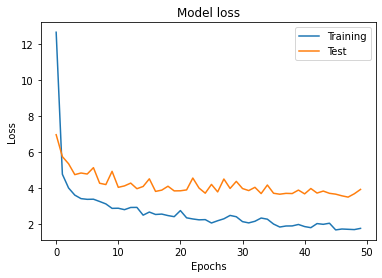

In [13]:
#plot the history
plt.figure(1)
plt.plot(np.sqrt(history.history['loss'])*max)
plt.plot(np.sqrt(history.history['val_loss'])*max)#We multiply by max to get numbers in dollars and understand it
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Test'], loc='upper right')

plt.show()